<a href="https://colab.research.google.com/github/maimuna01/Deepfake-Detection-using-Mesonet/blob/main/MesonetDeepfakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DariusAf/MesoNet.git


Cloning into 'MesoNet'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 78 (delta 29), reused 24 (delta 24), pack-reused 43
Receiving objects: 100% (78/78), 491.76 KiB | 8.94 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
%cd MesoNet


/content/MesoNet


In [ ]:
!pip install tensorflow numpy opencv-python


In [ ]:
!wget -P ./weights/ https://github.com/DariusAf/MesoNet/blob/master/weights/Meso4_DF.h5

--2024-05-04 06:23:13--  https://github.com/DariusAf/MesoNet/blob/master/weights/Meso4_DF.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./weights/Meso4_DF.h5.1’

Meso4_DF.h5.1           [ <=>                ] 144.13K  --.-KB/s    in 0.04s   

2024-05-04 06:23:13 (3.69 MB/s) - ‘./weights/Meso4_DF.h5.1’ saved [147594]



In [ ]:
!pip install tensorflow numpy opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)

In [ ]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF.h5')

In [ ]:
# Instantiate a data generator for image preprocessing
dataGenerator = ImageDataGenerator(rescale=1./255)

# Set the path to the directory containing your image data
data_directory = '/content/drive/MyDrive/data'

# Instantiating a generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    data_directory,                # Specify the directory path
    target_size=(256, 256),        # Set the target size for resizing images
    batch_size=1,                  # Set the batch size
    class_mode='binary'            # Set the class mode (e.g., 'binary' for binary classification)
)


Found 373 images belonging to 2 classes.


In [ ]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [ ]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints



rmdir: failed to remove '/s': No such file or directory
rmdir: failed to remove '/q': No such file or directory
rmdir: failed to remove 'c:data.ipynb_checkpoints': No such file or directory


In [ ]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)
new_data_directory = '/content/drive/MyDrive/data'

generator = dataGenerator.flow_from_directory(
    new_data_directory,
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 697 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 0s 453ms/step
Predicted likelihood: 0.6795
Actual label: 1
1/1 [==============================] - 0s 48ms/step

Correct prediction: True


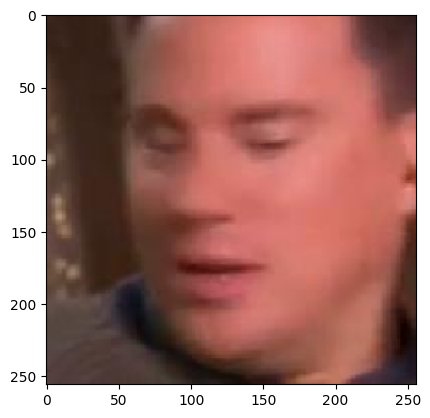

In [ ]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [ ]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [ ]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):

    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 38ms/step
0  predictions completed.
1/1 [==============================] - 0s 82ms/step
All 697 predictions completed


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

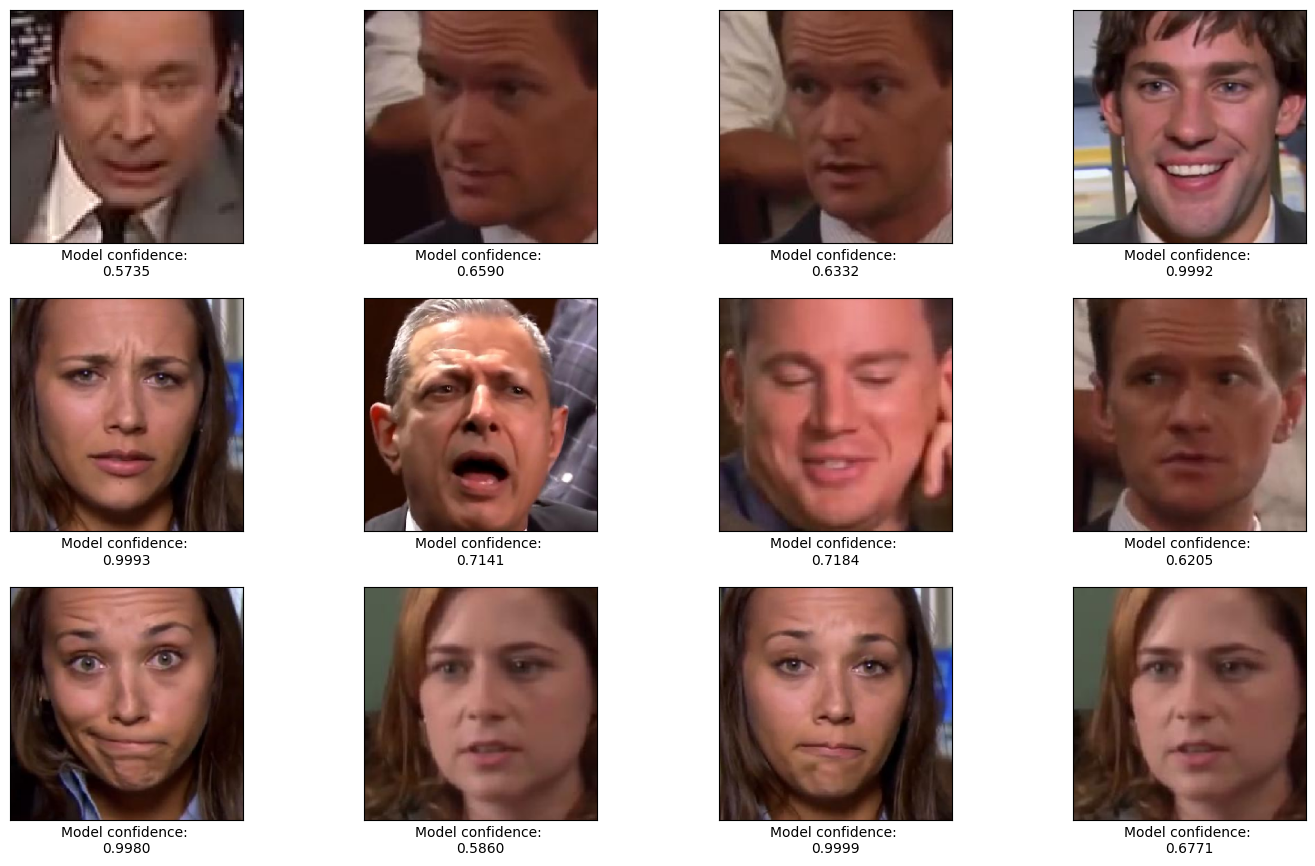

In [ ]:
plotter(correct_real, correct_real_pred)

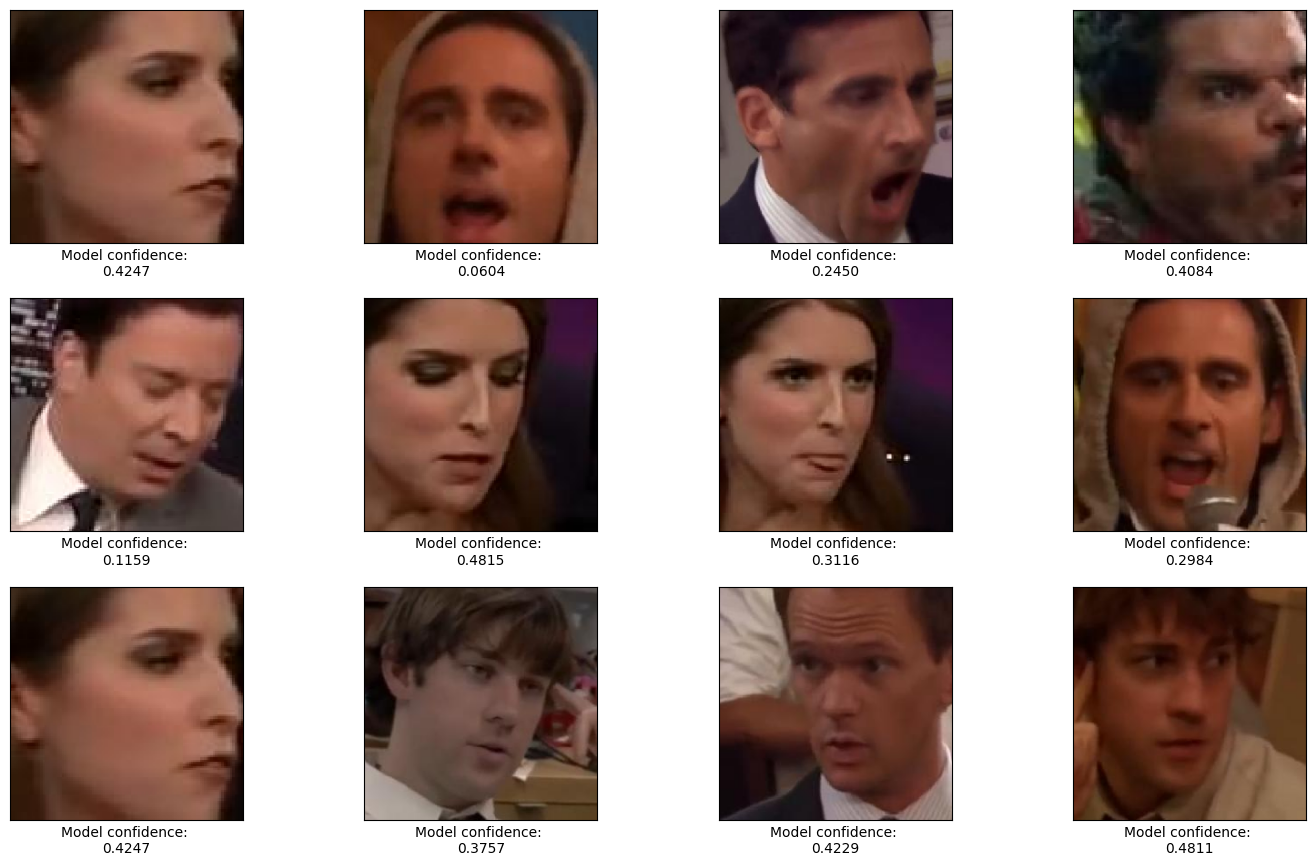

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

In [ ]:
plotter(correct_deepfake, correct_deepfake_pred)

ValueError: high <= 0

<Figure size 1600x900 with 0 Axes>

In [ ]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

ValueError: high <= 0

<Figure size 1600x900 with 0 Axes>